In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [46]:
df = pd.read_csv('titanic_train.csv')

In [47]:
print(df.shape)
print(df.columns)
df.head()

(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Pinting Missing Values Using Seaborn

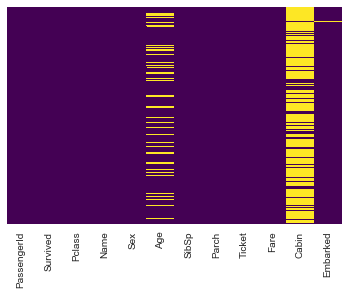

In [48]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# Yello denotes Missing Values

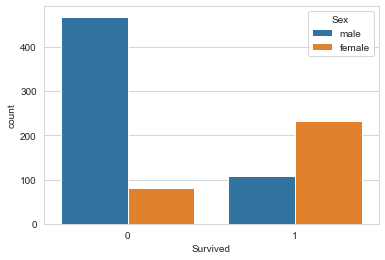

In [49]:
sns.set_style('whitegrid')
sns.countplot('Survived',hue='Sex',data=df)

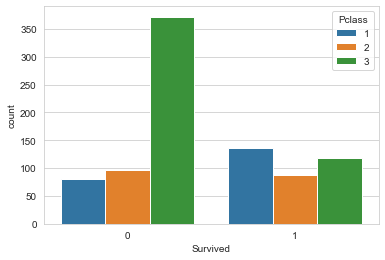

In [50]:
sns.set_style('whitegrid')
sns.countplot('Survived',hue='Pclass',data=df)

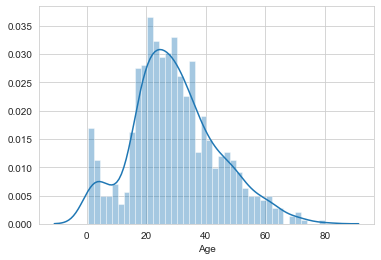

In [51]:
sns.distplot(df['Age'].dropna(),kde=True,bins=40)

### Data Cleaning

In [52]:
# Age column has null values we replace null values with the avg ages with respect to Pclass
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

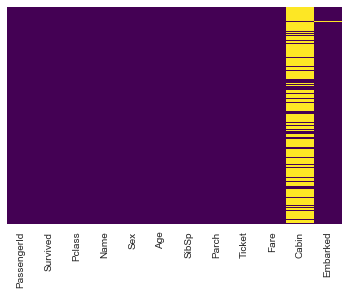

In [53]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# You can See here Null values of Age Column are filled

In [54]:
# Since There are So Many Null Values in Cabin Column we drop this column
df.drop('Cabin',axis=1,inplace = True)

In [55]:
# Here I Dont Need ,Name,Ticket
df.drop(['Name','Ticket'],axis=1,inplace=True)

# Encoding Categorical Values

In [56]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [58]:
# we encode 'Sex' and 'Embarked' Columns
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)

In [59]:
df = pd.concat([df,sex,embark],axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,1,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,3,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,4,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,5,0,3,male,35.0,0,0,8.0500,S,1,0,1


In [60]:
# Now We drop 'Sex','Embarked' Columns
df.drop(['Sex','Embarked'],axis=1,inplace=True)

In [61]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


### Splitting in to Train and Test Datasets

In [68]:

X = df.drop(['Survived'],axis = 1)
y = df['Survived']

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.2)

In [73]:
X_train

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
474,475,3,22.0,0,0,9.8375,0,0,1
21,22,2,34.0,0,0,13.0000,1,0,1
732,733,2,29.0,0,0,0.0000,1,0,1
819,820,3,10.0,3,2,27.9000,1,0,1
150,151,2,51.0,0,0,12.5250,1,0,1
...,...,...,...,...,...,...,...,...,...
813,814,3,6.0,4,2,31.2750,0,0,1
71,72,3,16.0,5,2,46.9000,0,0,1
146,147,3,27.0,0,0,7.7958,1,0,1
560,561,3,24.0,0,0,7.7500,1,1,0


### Building Logistic Regression Model

In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
model = LogisticRegression()

In [85]:
model.fit(X_train,Y_train)

C:\Users\KRISHNA VAMSI NADH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Predicting Values

In [86]:
predicted = model.predict(X_test)
model.score(X_test,Y_test)

0.8212290502793296

In [87]:
for i,j in zip(predicted,Y_test):
    print(i,j)

0 1
0 0
0 1
0 0
1 0
0 0
1 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
1 1
1 1
0 0
0 0
0 0
0 0
0 1
1 0
0 0
1 1
0 0
0 1
1 1
0 0
0 0
0 0
1 1
0 0
1 1
1 1
0 0
0 0
0 0
1 1
1 1
1 1
0 0
1 1
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
1 0
0 1
0 1
0 0
0 0
0 0
0 0
1 1
0 1
0 0
1 1
0 0
0 0
0 0
0 0
1 1
0 0
1 1
0 0
0 0
1 0
1 1
1 1
1 1
1 1
1 1
1 1
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
1 1
1 1
0 0
0 0
0 0
1 1
1 1
1 1
1 1
0 0
1 1
0 0
1 0
1 1
1 1
0 0
0 0
0 0
0 0
0 0
1 1
0 0
1 1
0 0
1 0
1 1
0 0
1 1
1 1
0 0
0 1
1 1
0 0
1 1
1 1
1 1
1 0
0 1
0 0
0 1
0 0
0 0
1 1
1 0
0 1
1 0
0 0
0 1
0 0
0 0
0 0
0 0
1 1
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
1 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
1 1
1 1
0 0
1 1
0 0
1 0
1 0
0 1
0 0
0 1
0 0
0 0
0 0
1 1


### Building RandomForest Regression

In [95]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [96]:
model.score(X_test,Y_test)

0.8324022346368715